# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

assert(len(X_train) == len(y_train))
n_train = len(y_train)

assert(len(X_valid) == len(y_valid))
n_validation = len(y_valid)

assert(len(X_test) == len(y_test))
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.amax(y_train) - np.amin(y_train) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

5


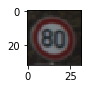

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random
import numpy as np

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
#normalize the data

for i in range(len(X_train)):
    X = X_train[i]
    temp = np.full(X.shape, 128)
    X = np.divide(X - temp, 128)
    

28
-0.78125
28
-0.78125
29
-0.7734375
31
-0.7578125
33
-0.7421875
30
-0.765625
32
-0.75
34
-0.734375
34
-0.734375
35
-0.7265625
32
-0.75
33
-0.7421875
31
-0.7578125
36
-0.71875
35
-0.7265625
36
-0.71875
38
-0.703125
35
-0.7265625
34
-0.734375
38
-0.703125
37
-0.7109375
35
-0.7265625
34
-0.734375
30
-0.765625
29
-0.7734375
28
-0.78125
28
-0.78125
35
-0.7265625
27
-0.7890625
29
-0.7734375
238
0.859375
233
0.8203125
227
0.7734375
240
0.875
210
0.640625
211
0.6484375
215
0.6796875
221
0.7265625
230
0.796875
218
0.703125
240
0.875
232
0.8125
226
0.765625
243
0.8984375
250
0.953125
252
0.96875
246
0.921875
232
0.8125
224
0.75
212
0.65625
215
0.6796875
204
0.59375
208
0.625
204
0.59375
190
0.484375
181
0.4140625
171
0.3359375
167
0.3046875
164
0.28125
162
0.265625
91
-0.2890625
58
-0.546875
40
-0.6875
46
-0.640625
54
-0.578125
47
-0.6328125
57
-0.5546875
57
-0.5546875
52
-0.59375
48
-0.625
47
-0.6328125
55
-0.5703125
67
-0.4765625
78
-0.390625
96
-0.25
85
-0.3359375
80
-0.375
74
-0.421875
59


133
0.0390625
133
0.0390625
136
0.0625
137
0.0703125
133
0.0390625
134
0.046875
136
0.0625
102
-0.203125
120
-0.0625
61
-0.5234375
61
-0.5234375
98
-0.234375
27
-0.7890625
22
-0.828125
23
-0.8203125
24
-0.8125
22
-0.828125
23
-0.8203125
23
-0.8203125
27
-0.7890625
25
-0.8046875
25
-0.8046875
19
-0.8515625
21
-0.8359375
19
-0.8515625
21
-0.8359375
20
-0.84375
23
-0.8203125
24
-0.8125
23
-0.8203125
28
-0.78125
32
-0.75
30
-0.765625
28
-0.78125
29
-0.7734375
27
-0.7890625
27
-0.7890625
27
-0.7890625
24
-0.8125
31
-0.7578125
34
-0.734375
38
-0.703125
201
0.5703125
241
0.8828125
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
84
-0.34375
88
-0.3125
77
-0.3984375
72
-0.4375
57
-0.5546875
61
-0.5234375
74
-0.421875
69
-0.4609375
82
-0.359375
75
-0.4140625
62
-0.515625
78
-0.390625
53
-0.5859375
80
-0.375
68
-0.46875
76
-0.40625
80
-0.375
62
-0.515625
110
-0.140625
55
-0.5703125
46
-0.640625
63
-0.5078125
97
-0.2421875
197
0.5390625
74
-0.421875
82
-0.359375
255
0.9921875
140
0.09375
2

-0.84375
21
-0.8359375
22
-0.828125
22
-0.828125
53
-0.5859375
65
-0.4921875
42
-0.671875
69
-0.4609375
73
-0.4296875
78
-0.390625
89
-0.3046875
51
-0.6015625
95
-0.2578125
51
-0.6015625
64
-0.5
57
-0.5546875
55
-0.5703125
51
-0.6015625
38
-0.703125
34
-0.734375
36
-0.71875
41
-0.6796875
36
-0.71875
20
-0.84375
38
-0.703125
30
-0.765625
25
-0.8046875
36
-0.71875
41
-0.6796875
43
-0.6640625
29
-0.7734375
41
-0.6796875
37
-0.7109375
38
-0.703125
35
-0.7265625
26
-0.796875
22
-0.828125
19
-0.8515625
16
-0.875
16
-0.875
14
-0.890625
15
-0.8828125
14
-0.890625
12
-0.90625
12
-0.90625
16
-0.875
16
-0.875
17
-0.8671875
19
-0.8515625
10
-0.921875
10
-0.921875
11
-0.9140625
12
-0.90625
32
-0.75
42
-0.671875
84
-0.34375
85
-0.3359375
66
-0.484375
96
-0.25
77
-0.3984375
79
-0.3828125
82
-0.359375
84
-0.34375
78
-0.390625
132
0.03125
134
0.046875
138
0.078125
132
0.03125
144
0.125
132
0.03125
139
0.0859375
136
0.0625
212
0.65625
94
-0.265625
88
-0.3125
88
-0.3125
76
-0.40625
73
-0.4296875
107
-0.1

26
-0.796875
31
-0.7578125
21
-0.8359375
20
-0.84375
33
-0.7421875
93
-0.2734375
21
-0.8359375
24
-0.8125
73
-0.4296875
72
-0.4375
88
-0.3125
92
-0.28125
90
-0.296875
244
0.90625
245
0.9140625
249
0.9453125
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
211
0.6484375
103
-0.1953125
99
-0.2265625
97
-0.2421875
100
-0.21875
105
-0.1796875
98
-0.234375
93
-0.2734375
95
-0.2578125
67
-0.4765625
96
-0.25
89
-0.3046875
99
-0.2265625
82
-0.359375
92
-0.28125
82
-0.359375
74
-0.421875
88
-0.3125
76
-0.40625
73
-0.4296875
60
-0.53125
81
-0.3671875
64
-0.5
58
-0.546875
59
-0.5390625
72
-0.4375
68
-0.46875
66
-0.484375
55
-0.5703125
54
-0.578125
60
-0.53125
55
-0.5703125
66
-0.484375
59
-0.5390625
54
-0.578125
48
-0.625
59
-0.5390625
47
-0.6328125
53
-0.5859375
62
-0.515625
52
-0.59375
54
-0.578125
71
-0.4453125
67
-0.4765625
86
-0.328125
61
-0.5234375
42
-0.671875
198
0.546875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875

51
-0.6015625
58
-0.546875
79
-0.3828125
58
-0.546875
31
-0.7578125
52
-0.59375
115
-0.1015625
142
0.109375
139
0.0859375
32
-0.75
26
-0.796875
15
-0.8828125
16
-0.875
19
-0.8515625
16
-0.875
16
-0.875
18
-0.859375
18
-0.859375
19
-0.8515625
18
-0.859375
19
-0.8515625
20
-0.84375
18
-0.859375
24
-0.8125
20
-0.84375
21
-0.8359375
22
-0.828125
27
-0.7890625
25
-0.8046875
21
-0.8359375
23
-0.8203125
24
-0.8125
25
-0.8046875
24
-0.8125
23
-0.8203125
23
-0.8203125
24
-0.8125
22
-0.828125
21
-0.8359375
22
-0.828125
21
-0.8359375
196
0.53125
202
0.578125
211
0.6484375
214
0.671875
195
0.5234375
161
0.2578125
215
0.6796875
208
0.625
203
0.5859375
201
0.5703125
179
0.3984375
154
0.203125
158
0.234375
121
-0.0546875
171
0.3359375
160
0.25
167
0.3046875
144
0.125
140
0.09375
133
0.0390625
71
-0.4453125
49
-0.6171875
103
-0.1953125
32
-0.75
23
-0.8203125
55
-0.5703125
53
-0.5859375
122
-0.046875
57
-0.5546875
120
-0.0625
50
-0.609375
92
-0.28125
69
-0.4609375
79
-0.3828125
246
0.921875
110
-0.1406

-0.2734375
43
-0.6640625
36
-0.71875
44
-0.65625
52
-0.59375
36
-0.71875
166
0.296875
137
0.0703125
133
0.0390625
138
0.078125
110
-0.140625
164
0.28125
221
0.7265625
230
0.796875
239
0.8671875
249
0.9453125
254
0.984375
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
251
0.9609375
255
0.9921875
233
0.8203125
132
0.03125
221
0.7265625
217
0.6953125
134
0.046875
84
-0.34375
87
-0.3203125
79
-0.3828125
89
-0.3046875
69
-0.4609375
82
-0.359375
163
0.2734375
74
-0.421875
60
-0.53125
74
-0.421875
59
-0.5390625
136
0.0625
235
0.8359375
224
0.75
210
0.640625
151
0.1796875
154
0.203125
192
0.5
210
0.640625
208
0.625
38
-0.703125
36
-0.71875
52
-0.59375
75
-0.4140625
91
-0.2890625
93
-0.2734375
96
-0.25
80
-0.375
73
-0.4296875
86
-0.328125
106
-0.171875
55
-0.5703125
80
-0.375
114
-0.109375
101
-0.2109375
73
-0.4296875
109
-0.1484375
66
-0.484375
51
-0.6015625
61
-0.5234375
136
0.0625
157
0.2265625
212
0.65625
205
0.6015625
223
0.7421875
196
0.53125
219
0.7109375
186
0.453

22
-0.828125
25
-0.8046875
27
-0.7890625
26
-0.796875
32
-0.75
35
-0.7265625
30
-0.765625
31
-0.7578125
22
-0.828125
23
-0.8203125
26
-0.796875
28
-0.78125
24
-0.8125
23
-0.8203125
22
-0.828125
21
-0.8359375
21
-0.8359375
22
-0.828125
23
-0.8203125
24
-0.8125
22
-0.828125
25
-0.8046875
22
-0.828125
18
-0.859375
20
-0.84375
21
-0.8359375
22
-0.828125
22
-0.828125
18
-0.859375
21
-0.8359375
31
-0.7578125
34
-0.734375
31
-0.7578125
33
-0.7421875
32
-0.75
30
-0.765625
32
-0.75
29
-0.7734375
28
-0.78125
27
-0.7890625
27
-0.7890625
30
-0.765625
30
-0.765625
32
-0.75
32
-0.75
33
-0.7421875
30
-0.765625
31
-0.7578125
32
-0.75
28
-0.78125
30
-0.765625
26
-0.796875
22
-0.828125
34
-0.734375
32
-0.75
29
-0.7734375
30
-0.765625
26
-0.796875
19
-0.8515625
26
-0.796875
26
-0.796875
28
-0.78125
25
-0.8046875
27
-0.7890625
26
-0.796875
25
-0.8046875
27
-0.7890625
26
-0.796875
25
-0.8046875
28
-0.78125
30
-0.765625
29
-0.7734375
31
-0.7578125
28
-0.78125
29
-0.7734375
32
-0.75
34
-0.734375
31
-0.757812

172
0.34375
178
0.390625
183
0.4296875
199
0.5546875
198
0.546875
190
0.484375
193
0.5078125
216
0.6875
224
0.75
218
0.703125
216
0.6875
214
0.671875
212
0.65625
196
0.53125
201
0.5703125
198
0.546875
185
0.4453125
165
0.2890625
166
0.296875
162
0.265625
47
-0.6328125
43
-0.6640625
43
-0.6640625
50
-0.609375
38
-0.703125
53
-0.5859375
50
-0.609375
55
-0.5703125
56
-0.5625
61
-0.5234375
61
-0.5234375
61
-0.5234375
53
-0.5859375
50
-0.609375
64
-0.5
67
-0.4765625
60
-0.53125
52
-0.59375
78
-0.390625
68
-0.46875
53
-0.5859375
55
-0.5703125
39
-0.6953125
42
-0.671875
46
-0.640625
23
-0.8203125
26
-0.796875
29
-0.7734375
32
-0.75
43
-0.6640625
12
-0.90625
13
-0.8984375
12
-0.90625
11
-0.9140625
12
-0.90625
13
-0.8984375
12
-0.90625
13
-0.8984375
11
-0.9140625
13
-0.8984375
13
-0.8984375
11
-0.9140625
11
-0.9140625
12
-0.90625
16
-0.875
12
-0.90625
9
-0.9296875
13
-0.8984375
12
-0.90625
9
-0.9296875
66
-0.484375
104
-0.1875
92
-0.28125
59
-0.5390625
151
0.1796875
99
-0.2265625
94
-0.265625
1

-0.8203125
41
-0.6796875
38
-0.703125
37
-0.7109375
37
-0.7109375
36
-0.71875
37
-0.7109375
37
-0.7109375
36
-0.71875
38
-0.703125
40
-0.6875
38
-0.703125
21
-0.8359375
18
-0.859375
41
-0.6796875
25
-0.8046875
19
-0.8515625
21
-0.8359375
22
-0.828125
29
-0.7734375
41
-0.6796875
44
-0.65625
20
-0.84375
21
-0.8359375
17
-0.8671875
21
-0.8359375
47
-0.6328125
98
-0.234375
108
-0.15625
108
-0.15625
108
-0.15625
89
-0.3046875
101
-0.2109375
94
-0.265625
80
-0.375
59
-0.5390625
26
-0.796875
22
-0.828125
18
-0.859375
19
-0.8515625
15
-0.8828125
17
-0.8671875
17
-0.8671875
21
-0.8359375
18
-0.859375
18
-0.859375
19
-0.8515625
19
-0.8515625
22
-0.828125
25
-0.8046875
21
-0.8359375
40
-0.6875
21
-0.8359375
19
-0.8515625
15
-0.8828125
26
-0.796875
21
-0.8359375
122
-0.046875
175
0.3671875
109
-0.1484375
136
0.0625
235
0.8359375
226
0.765625
91
-0.2890625
93
-0.2734375
111
-0.1328125
107
-0.1640625
81
-0.3671875
130
0.015625
157
0.2265625
82
-0.359375
88
-0.3125
103
-0.1953125
126
-0.015625
45
-0.

104
-0.1875
83
-0.3515625
148
0.15625
133
0.0390625
76
-0.40625
69
-0.4609375
80
-0.375
68
-0.46875
73
-0.4296875
164
0.28125
111
-0.1328125
94
-0.265625
116
-0.09375
99
-0.2265625
62
-0.515625
74
-0.421875
48
-0.625
58
-0.546875
88
-0.3125
114
-0.109375
160
0.25
46
-0.640625
97
-0.2421875
47
-0.6328125
51
-0.6015625
61
-0.5234375
56
-0.5625
53
-0.5859375
48
-0.625
67
-0.4765625
59
-0.5390625
37
-0.7109375
25
-0.8046875
22
-0.828125
46
-0.640625
31
-0.7578125
101
-0.2109375
87
-0.3203125
69
-0.4609375
33
-0.7421875
37
-0.7109375
30
-0.765625
31
-0.7578125
37
-0.7109375
37
-0.7109375
35
-0.7265625
37
-0.7109375
40
-0.6875
40
-0.6875
43
-0.6640625
51
-0.6015625
73
-0.4296875
73
-0.4296875
51
-0.6015625
69
-0.4609375
41
-0.6796875
43
-0.6640625
39
-0.6953125
39
-0.6953125
37
-0.7109375
32
-0.75
32
-0.75
33
-0.7421875
30
-0.765625
26
-0.796875
32
-0.75
26
-0.796875
25
-0.8046875
26
-0.796875
55
-0.5703125
46
-0.640625
50
-0.609375
54
-0.578125
55
-0.5703125
41
-0.6796875
44
-0.65625
40
-0.

255
0.9921875
226
0.765625
79
-0.3828125
255
0.9921875
237
0.8515625
136
0.0625
88
-0.3125
53
-0.5859375
138
0.078125
51
-0.6015625
53
-0.5859375
42
-0.671875
44
-0.65625
43
-0.6640625
41
-0.6796875
43
-0.6640625
38
-0.703125
36
-0.71875
37
-0.7109375
36
-0.71875
36
-0.71875
35
-0.7265625
42
-0.671875
38
-0.703125
64
-0.5
18
-0.859375
18
-0.859375
18
-0.859375
18
-0.859375
20
-0.84375
19
-0.8515625
18
-0.859375
19
-0.8515625
19
-0.8515625
19
-0.8515625
17
-0.8671875
16
-0.875
18
-0.859375
17
-0.8671875
18
-0.859375
18
-0.859375
18
-0.859375
19
-0.8515625
19
-0.8515625
17
-0.8671875
17
-0.8671875
19
-0.8515625
20
-0.84375
20
-0.84375
21
-0.8359375
21
-0.8359375
24
-0.8125
24
-0.8125
31
-0.7578125
28
-0.78125
78
-0.390625
85
-0.3359375
37
-0.7109375
38
-0.703125
37
-0.7109375
34
-0.734375
34
-0.734375
32
-0.75
31
-0.7578125
33
-0.7421875
31
-0.7578125
31
-0.7578125
30
-0.765625
18
-0.859375
22
-0.828125
25
-0.8046875
24
-0.8125
23
-0.8203125
24
-0.8125
25
-0.8046875
47
-0.6328125
27
-0.7

-0.046875
115
-0.1015625
215
0.6796875
225
0.7578125
227
0.7734375
225
0.7578125
224
0.75
223
0.7421875
224
0.75
216
0.6875
213
0.6640625
210
0.640625
217
0.6953125
212
0.65625
142
0.109375
161
0.2578125
169
0.3203125
127
-0.0078125
146
0.140625
171
0.3359375
155
0.2109375
146
0.140625
148
0.15625
111
-0.1328125
107
-0.1640625
36
-0.71875
37
-0.7109375
38
-0.703125
34
-0.734375
35
-0.7265625
35
-0.7265625
41
-0.6796875
38
-0.703125
33
-0.7421875
59
-0.5390625
74
-0.421875
45
-0.6484375
37
-0.7109375
45
-0.6484375
26
-0.796875
20
-0.84375
34
-0.734375
20
-0.84375
20
-0.84375
121
-0.0546875
149
0.1640625
102
-0.203125
41
-0.6796875
180
0.40625
41
-0.6796875
65
-0.4921875
40
-0.6875
48
-0.625
160
0.25
52
-0.59375
44
-0.65625
38
-0.703125
33
-0.7421875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
133
0.0390625
136
0.0625
181
0.4140625
144
0.125
149
0.1640625
165
0.2890625
146
0.140625
231
0.8046875
254
0.984375
245
0.9140625
255
0.992187

54
-0.578125
57
-0.5546875
47
-0.6328125
37
-0.7109375
39
-0.6953125
51
-0.6015625
43
-0.6640625
56
-0.5625
42
-0.671875
48
-0.625
43
-0.6640625
42
-0.671875
46
-0.640625
28
-0.78125
42
-0.671875
41
-0.6796875
40
-0.6875
49
-0.6171875
52
-0.59375
50
-0.609375
52
-0.59375
68
-0.46875
43
-0.6640625
57
-0.5546875
52
-0.59375
33
-0.7421875
49
-0.6171875
45
-0.6484375
43
-0.6640625
30
-0.765625
41
-0.6796875
49
-0.6171875
48
-0.625
55
-0.5703125
48
-0.625
73
-0.4296875
23
-0.8203125
30
-0.765625
20
-0.84375
53
-0.5859375
98
-0.234375
74
-0.421875
11
-0.9140625
127
-0.0078125
87
-0.3203125
92
-0.28125
85
-0.3359375
58
-0.546875
65
-0.4921875
56
-0.5625
48
-0.625
26
-0.796875
167
0.3046875
72
-0.4375
101
-0.2109375
132
0.03125
59
-0.5390625
62
-0.515625
91
-0.2890625
112
-0.125
55
-0.5703125
53
-0.5859375
106
-0.171875
108
-0.15625
48
-0.625
84
-0.34375
85
-0.3359375
100
-0.21875
64
-0.5
49
-0.6171875
105
-0.1796875
71
-0.4453125
38
-0.703125
16
-0.875
14
-0.890625
14
-0.890625
14
-0.890625
1

245
0.9140625
253
0.9765625
167
0.3046875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
236
0.84375
130
0.015625
84
-0.34375
29
-0.7734375
25
-0.8046875
29
-0.7734375
27
-0.7890625
29
-0.7734375
37
-0.7109375
53
-0.5859375
32
-0.75
107
-0.1640625
134
0.046875
60
-0.53125
61
-0.5234375
51
-0.6015625
91
-0.2890625
149
0.1640625
49
-0.6171875
79
-0.3828125
44
-0.65625
51
-0.6015625
28
-0.78125
34
-0.734375
37
-0.7109375
36
-0.71875
49
-0.6171875
20
-0.84375
25
-0.8046875
50
-0.609375
63
-0.5078125
22
-0.828125
52
-0.59375
83
-0.3515625
81
-0.3671875
84
-0.34375
83
-0.3515625
85
-0.3359375
82
-0.359375
84
-0.34375
85
-0.3359375
86
-0.328125
82
-0.359375
83
-0.3515625
84
-0.34375
84
-0.34375
84
-0.34375
83
-0.3515625
86
-0.328125
84
-0.34375
84
-0.34375
81
-0.3671875
84
-0.34375
83
-0.3515625
85
-0.3359375
86
-0.328125
81
-0.3671875
84
-0.34375
85
-0.3359375
81
-0.3671875
81
-0.3671875
79
-0.3828125
82
-0.359375

29
-0.7734375
30
-0.765625
34
-0.734375
35
-0.7265625
36
-0.71875
32
-0.75
34
-0.734375
31
-0.7578125
34
-0.734375
29
-0.7734375
31
-0.7578125
32
-0.75
27
-0.7890625
24
-0.8125
26
-0.796875
22
-0.828125
21
-0.8359375
18
-0.859375
16
-0.875
18
-0.859375
16
-0.875
14
-0.890625
14
-0.890625
15
-0.8828125
13
-0.8984375
14
-0.890625
11
-0.9140625
12
-0.90625
18
-0.859375
17
-0.8671875
19
-0.8515625
18
-0.859375
17
-0.8671875
17
-0.8671875
18
-0.859375
18
-0.859375
18
-0.859375
18
-0.859375
19
-0.8515625
16
-0.875
18
-0.859375
17
-0.8671875
18
-0.859375
17
-0.8671875
16
-0.875
16
-0.875
15
-0.8828125
16
-0.875
16
-0.875
15
-0.8828125
14
-0.890625
17
-0.8671875
15
-0.8828125
14
-0.890625
17
-0.8671875
13
-0.8984375
17
-0.8671875
13
-0.8984375
46
-0.640625
47
-0.6328125
49
-0.6171875
89
-0.3046875
62
-0.515625
67
-0.4765625
93
-0.2734375
90
-0.296875
65
-0.4921875
78
-0.390625
55
-0.5703125
50
-0.609375
41
-0.6796875
51
-0.6015625
49
-0.6171875
45
-0.6484375
46
-0.640625
42
-0.671875
37
-0.710

15
-0.8828125
16
-0.875
14
-0.890625
13
-0.8984375
15
-0.8828125
14
-0.890625
13
-0.8984375
14
-0.890625
13
-0.8984375
13
-0.8984375
15
-0.8828125
13
-0.8984375
13
-0.8984375
13
-0.8984375
15
-0.8828125
15
-0.8828125
15
-0.8828125
15
-0.8828125
15
-0.8828125
15
-0.8828125
19
-0.8515625
15
-0.8828125
16
-0.875
18
-0.859375
23
-0.8203125
78
-0.390625
128
0.0
146
0.140625
61
-0.5234375
37
-0.7109375
31
-0.7578125
29
-0.7734375
46
-0.640625
72
-0.4375
57
-0.5546875
112
-0.125
135
0.0546875
127
-0.0078125
147
0.1484375
130
0.015625
123
-0.0390625
151
0.1796875
180
0.40625
174
0.359375
180
0.40625
173
0.3515625
125
-0.0234375
137
0.0703125
172
0.34375
184
0.4375
176
0.375
144
0.125
122
-0.046875
141
0.1015625
82
-0.359375
19
-0.8515625
20
-0.84375
19
-0.8515625
20
-0.84375
19
-0.8515625
20
-0.84375
19
-0.8515625
19
-0.8515625
18
-0.859375
18
-0.859375
19
-0.8515625
18
-0.859375
22
-0.828125
22
-0.828125
21
-0.8359375
18
-0.859375
20
-0.84375
19
-0.8515625
16
-0.875
20
-0.84375
26
-0.796875
2

105
-0.1796875
98
-0.234375
124
-0.03125
117
-0.0859375
107
-0.1640625
131
0.0234375
110
-0.140625
96
-0.25
95
-0.2578125
91
-0.2890625
95
-0.2578125
77
-0.3984375
76
-0.40625
67
-0.4765625
148
0.15625
63
-0.5078125
75
-0.4140625
46
-0.640625
28
-0.78125
29
-0.7734375
32
-0.75
30
-0.765625
29
-0.7734375
33
-0.7421875
24
-0.8125
26
-0.796875
22
-0.828125
23
-0.8203125
22
-0.828125
25
-0.8046875
27
-0.7890625
29
-0.7734375
29
-0.7734375
28
-0.78125
28
-0.78125
26
-0.796875
20
-0.84375
19
-0.8515625
25
-0.8046875
24
-0.8125
24
-0.8125
35
-0.7265625
38
-0.703125
31
-0.7578125
21
-0.8359375
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
242
0.890625
252
0.96875
193
0.5078125
135
0.0546875
149
0.1640625
179
0.3984375
158
0.234375
147
0.1484375
61
-0.5234375
53
-0.5859375
43
-0.6640625
42
-0.671875
56
-0.5625
73
-0.4296875
45
-0.6484375
60
-0.53125
39
-0.6953125
36
-0.71875
50
-0.609375
39
-0.6953125
36
-0.71875
55
-0.5703125
49
-0.6171875
32
-0.75
42
-0.6

51
-0.6015625
54
-0.578125
44
-0.65625
52
-0.59375
58
-0.546875
46
-0.640625
41
-0.6796875
42
-0.671875
48
-0.625
41
-0.6796875
47
-0.6328125
23
-0.8203125
16
-0.875
13
-0.8984375
12
-0.90625
17
-0.8671875
22
-0.828125
36
-0.71875
37
-0.7109375
57
-0.5546875
62
-0.515625
63
-0.5078125
61
-0.5234375
55
-0.5703125
209
0.6328125
127
-0.0078125
75
-0.4140625
236
0.84375
238
0.859375
80
-0.375
71
-0.4453125
74
-0.421875
82
-0.359375
78
-0.390625
71
-0.4453125
65
-0.4921875
43
-0.6640625
82
-0.359375
104
-0.1875
105
-0.1796875
77
-0.3984375
98
-0.234375
47
-0.6328125
255
0.9921875
131
0.0234375
32
-0.75
86
-0.328125
254
0.984375
255
0.9921875
227
0.7734375
216
0.6875
212
0.65625
163
0.2734375
126
-0.015625
140
0.09375
55
-0.5703125
51
-0.6015625
42
-0.671875
47
-0.6328125
199
0.5546875
200
0.5625
194
0.515625
199
0.5546875
189
0.4765625
187
0.4609375
185
0.4453125
181
0.4140625
178
0.390625
173
0.3515625
173
0.3515625
171
0.3359375
172
0.34375
165
0.2890625
164
0.28125
165
0.2890625
167
0.30

-0.90625
15
-0.8828125
13
-0.8984375
13
-0.8984375
13
-0.8984375
10
-0.921875
12
-0.90625
13
-0.8984375
13
-0.8984375
13
-0.8984375
13
-0.8984375
13
-0.8984375
12
-0.90625
13
-0.8984375
13
-0.8984375
15
-0.8828125
13
-0.8984375
13
-0.8984375
14
-0.890625
13
-0.8984375
19
-0.8515625
21
-0.8359375
21
-0.8359375
28
-0.78125
20
-0.84375
20
-0.84375
15
-0.8828125
25
-0.8046875
16
-0.875
25
-0.8046875
18
-0.859375
15
-0.8828125
18
-0.859375
16
-0.875
16
-0.875
19
-0.8515625
16
-0.875
20
-0.84375
16
-0.875
18
-0.859375
17
-0.8671875
17
-0.8671875
19
-0.8515625
22
-0.828125
29
-0.7734375
44
-0.65625
40
-0.6875
75
-0.4140625
90
-0.296875
14
-0.890625
37
-0.7109375
36
-0.71875
35
-0.7265625
35
-0.7265625
36
-0.71875
35
-0.7265625
37
-0.7109375
35
-0.7265625
36
-0.71875
34
-0.734375
36
-0.71875
34
-0.734375
35
-0.7265625
37
-0.7109375
37
-0.7109375
34
-0.734375
35
-0.7265625
37
-0.7109375
37
-0.7109375
37
-0.7109375
40
-0.6875
39
-0.6953125
37
-0.7109375
40
-0.6875
42
-0.671875
39
-0.6953125
41
-

-0.7265625
27
-0.7890625
28
-0.78125
27
-0.7890625
31
-0.7578125
29
-0.7734375
31
-0.7578125
26
-0.796875
27
-0.7890625
35
-0.7265625
28
-0.78125
29
-0.7734375
27
-0.7890625
26
-0.796875
120
-0.0625
73
-0.4296875
171
0.3359375
55
-0.5703125
35
-0.7265625
35
-0.7265625
28
-0.78125
30
-0.765625
34
-0.734375
36
-0.71875
32
-0.75
25
-0.8046875
30
-0.765625
37
-0.7109375
32
-0.75
75
-0.4140625
120
-0.0625
161
0.2578125
159
0.2421875
154
0.203125
161
0.2578125
159
0.2421875
169
0.3203125
164
0.28125
150
0.171875
155
0.2109375
155
0.2109375
164
0.28125
162
0.265625
146
0.140625
201
0.5703125
162
0.265625
139
0.0859375
31
-0.7578125
27
-0.7890625
27
-0.7890625
25
-0.8046875
25
-0.8046875
23
-0.8203125
22
-0.828125
20
-0.84375
22
-0.828125
20
-0.84375
19
-0.8515625
18
-0.859375
16
-0.875
20
-0.84375
22
-0.828125
20
-0.84375
24
-0.8125
19
-0.8515625
22
-0.828125
16
-0.875
17
-0.8671875
18
-0.859375
19
-0.8515625
19
-0.8515625
19
-0.8515625
18
-0.859375
17
-0.8671875
17
-0.8671875
15
-0.8828125
2

-0.875
19
-0.8515625
19
-0.8515625
23
-0.8203125
32
-0.75
48
-0.625
20
-0.84375
28
-0.78125
28
-0.78125
16
-0.875
17
-0.8671875
26
-0.796875
23
-0.8203125
22
-0.828125
20
-0.84375
24
-0.8125
20
-0.84375
25
-0.8046875
36
-0.71875
61
-0.5234375
81
-0.3671875
37
-0.7109375
26
-0.796875
60
-0.53125
34
-0.734375
14
-0.890625
16
-0.875
24
-0.8125
22
-0.828125
50
-0.609375
55
-0.5703125
144
0.125
98
-0.234375
255
0.9921875
253
0.9765625
229
0.7890625
255
0.9921875
242
0.890625
105
-0.1796875
12
-0.90625
13
-0.8984375
11
-0.9140625
11
-0.9140625
14
-0.890625
12
-0.90625
13
-0.8984375
15
-0.8828125
16
-0.875
12
-0.90625
16
-0.875
18
-0.859375
19
-0.8515625
20
-0.84375
20
-0.84375
29
-0.7734375
50
-0.609375
25
-0.8046875
25
-0.8046875
28
-0.78125
25
-0.8046875
22
-0.828125
35
-0.7265625
14
-0.890625
24
-0.8125
13
-0.8984375
11
-0.9140625
13
-0.8984375
12
-0.90625
10
-0.921875
28
-0.78125
25
-0.8046875
21
-0.8359375
18
-0.859375
14
-0.890625
14
-0.890625
12
-0.90625
13
-0.8984375
12
-0.90625
11
-

108
-0.15625
50
-0.609375
51
-0.6015625
50
-0.609375
51
-0.6015625
48
-0.625
47
-0.6328125
51
-0.6015625
54
-0.578125
55
-0.5703125
56
-0.5625
50
-0.609375
52
-0.59375
47
-0.6328125
45
-0.6484375
47
-0.6328125
48
-0.625
47
-0.6328125
44
-0.65625
43
-0.6640625
43
-0.6640625
57
-0.5546875
58
-0.546875
56
-0.5625
64
-0.5
50
-0.609375
50
-0.609375
52
-0.59375
46
-0.640625
45
-0.6484375
50
-0.609375
79
-0.3828125
70
-0.453125
82
-0.359375
81
-0.3671875
83
-0.3515625
77
-0.3984375
59
-0.5390625
112
-0.125
251
0.9609375
253
0.9765625
236
0.84375
92
-0.28125
53
-0.5859375
41
-0.6796875
25
-0.8046875
25
-0.8046875
23
-0.8203125
27
-0.7890625
25
-0.8046875
25
-0.8046875
27
-0.7890625
24
-0.8125
20
-0.84375
24
-0.8125
21
-0.8359375
28
-0.78125
23
-0.8203125
22
-0.828125
21
-0.8359375
18
-0.859375
14
-0.890625
13
-0.8984375
13
-0.8984375
15
-0.8828125
15
-0.8828125
16
-0.875
24
-0.8125
17
-0.8671875
14
-0.890625
11
-0.9140625
13
-0.8984375
12
-0.90625
14
-0.890625
10
-0.921875
11
-0.9140625
14
-0.

205
0.6015625
235
0.8359375
255
0.9921875
255
0.9921875
239
0.8671875
179
0.3984375
134
0.046875
96
-0.25
108
-0.15625
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
248
0.9375
231
0.8046875
255
0.9921875
254
0.984375
251
0.9609375
228
0.78125
209
0.6328125
255
0.9921875
225
0.7578125
255
0.9921875
255
0.9921875
248
0.9375
252
0.96875
113
-0.1171875
218
0.703125
199
0.5546875
76
-0.40625
151
0.1796875
124
-0.03125
160
0.25
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
176
0.375
255
0.9921875
255
0.9921875
254
0.984375
210
0.640625
128
0.0
209
0.6328125
107
-0.1640625
253
0.9765625
255
0.9921875
245
0.9140625
255
0.9921875
255
0.9921875
255
0.9921875
226
0.765625
92
-0.28125
186
0.453125
94
-0.265625
97
-0.2421875
111
-0.1328125
116
-0.09375
160
0.25
163
0.2734375
253
0.9765625
248
0.9375
145
0.1328125
167
0.3046875
188
0.46875
23

65
-0.4921875
74
-0.421875
74
-0.421875
139
0.0859375
196
0.53125
220
0.71875
230
0.796875
238
0.859375
243
0.8984375
147
0.1484375
215
0.6796875
235
0.8359375
105
-0.1796875
100
-0.21875
104
-0.1875
141
0.1015625
79
-0.3828125
230
0.796875
202
0.578125
158
0.234375
129
0.0078125
88
-0.3125
88
-0.3125
84
-0.34375
95
-0.2578125
92
-0.28125
140
0.09375
160
0.25
180
0.40625
155
0.2109375
178
0.390625
194
0.515625
191
0.4921875
196
0.53125
212
0.65625
193
0.5078125
118
-0.078125
123
-0.0390625
105
-0.1796875
161
0.2578125
167
0.3046875
83
-0.3515625
69
-0.4609375
78
-0.390625
84
-0.34375
78
-0.390625
75
-0.4140625
96
-0.25
80
-0.375
95
-0.2578125
81
-0.3671875
83
-0.3515625
83
-0.3515625
73
-0.4296875
71
-0.4453125
64
-0.5
70
-0.453125
87
-0.3203125
69
-0.4609375
76
-0.40625
69
-0.4609375
81
-0.3671875
88
-0.3125
107
-0.1640625
81
-0.3671875
99
-0.2265625
143
0.1171875
58
-0.546875
158
0.234375
130
0.015625
89
-0.3046875
52
-0.59375
56
-0.5625
56
-0.5625
36
-0.71875
52
-0.59375
47
-0.63281

91
-0.2890625
94
-0.265625
90
-0.296875
85
-0.3359375
52
-0.59375
68
-0.46875
62
-0.515625
36
-0.71875
43
-0.6640625
46
-0.640625
53
-0.5859375
46
-0.640625
60
-0.53125
41
-0.6796875
49
-0.6171875
28
-0.78125
28
-0.78125
30
-0.765625
31
-0.7578125
33
-0.7421875
29
-0.7734375
31
-0.7578125
34
-0.734375
38
-0.703125
31
-0.7578125
34
-0.734375
30
-0.765625
28
-0.78125
34
-0.734375
34
-0.734375
37
-0.7109375
34
-0.734375
40
-0.6875
37
-0.7109375
32
-0.75
35
-0.7265625
35
-0.7265625
39
-0.6953125
30
-0.765625
32
-0.75
29
-0.7734375
22
-0.828125
29
-0.7734375
35
-0.7265625
27
-0.7890625
14
-0.890625
15
-0.8828125
15
-0.8828125
15
-0.8828125
14
-0.890625
12
-0.90625
15
-0.8828125
14
-0.890625
15
-0.8828125
15
-0.8828125
14
-0.890625
14
-0.890625
13
-0.8984375
12
-0.90625
13
-0.8984375
13
-0.8984375
13
-0.8984375
14
-0.890625
12
-0.90625
14
-0.890625
12
-0.90625
12
-0.90625
11
-0.9140625
15
-0.8828125
14
-0.890625
11
-0.9140625
19
-0.8515625
13
-0.8984375
25
-0.8046875
24
-0.8125
58
-0.546875


26
-0.796875
41
-0.6796875
45
-0.6484375
36
-0.71875
24
-0.8125
24
-0.8125
118
-0.078125
168
0.3125
229
0.7890625
190
0.484375
179
0.3984375
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
23
-0.8203125
23
-0.8203125
22
-0.828125
19
-0.8515625
20
-0.84375
21
-0.8359375
23
-0.8203125
21
-0.8359375
21
-0.8359375
22
-0.828125
21
-0.8359375
20
-0.84375
22
-0.828125
25
-0.8046875
25
-0.8046875
23
-0.8203125
22
-0.828125
20
-0.84375
21
-0.8359375
19
-0.8515625
20
-0.84375
22
-0.828125
19
-0.8515625
18
-0.859375
20
-0.84375
19
-0.8515625
22
-0.828125
15
-0.8828125
30
-0.765625
23
-0.8203125
22
-0.828125
22
-0.828125
19
-0.8515625
18
-0.859375
19
-0.8515625
25
-0.8046875
35
-0.7265625
37
-0.7109375
42
-0.671875
39
-0.6953125
41
-0.6796875
30
-0.765625
31
-0.7578125
28
-0.78125
24
-0.8125
25
-0.8046875
25
-0.8046875
24
-0.8125
23
-0.8203125
20
-0.84375
46
-0.640625
30
-0.765625
23
-0.8203125
19
-0.8515625
27
-0.7890625
33
-0.7421875
65
-0.4921875
49
-0.6171875
31
-0.7578125
15
-0.882812

-0.453125
69
-0.4609375
66
-0.484375
77
-0.3984375
74
-0.421875
69
-0.4609375
55
-0.5703125
53
-0.5859375
55
-0.5703125
51
-0.6015625
15
-0.8828125
15
-0.8828125
18
-0.859375
20
-0.84375
31
-0.7578125
20
-0.84375
29
-0.7734375
17
-0.8671875
19
-0.8515625
21
-0.8359375
18
-0.859375
18
-0.859375
19
-0.8515625
17
-0.8671875
18
-0.859375
27
-0.7890625
42
-0.671875
48
-0.625
46
-0.640625
94
-0.265625
144
0.125
164
0.28125
179
0.3984375
184
0.4375
171
0.3359375
145
0.1328125
147
0.1484375
159
0.2421875
170
0.328125
153
0.1953125
67
-0.4765625
91
-0.2890625
79
-0.3828125
72
-0.4375
180
0.40625
255
0.9921875
255
0.9921875
174
0.359375
84
-0.34375
94
-0.265625
92
-0.28125
83
-0.3515625
92
-0.28125
145
0.1328125
96
-0.25
97
-0.2421875
115
-0.1015625
86
-0.328125
79
-0.3828125
62
-0.515625
67
-0.4765625
62
-0.515625
69
-0.4609375
77
-0.3984375
70
-0.453125
84
-0.34375
90
-0.296875
54
-0.578125
61
-0.5234375
40
-0.6875
193
0.5078125
159
0.2421875
184
0.4375
153
0.1953125
148
0.15625
150
0.171875
1

0.9140625
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
26
-0.796875
19
-0.8515625
49
-0.6171875
62
-0.515625
16
-0.875
16
-0.875
22
-0.828125
22
-0.828125
47
-0.6328125
101
-0.2109375
80
-0.375
148
0.15625
33
-0.7421875
19
-0.8515625
20
-0.84375
36
-0.71875
31
-0.7578125
24
-0.8125
26
-0.796875
34
-0.734375
60
-0.53125
42
-0.671875
19
-0.8515625
60
-0.53125
116
-0.09375
68
-0.46875
63
-0.5078125
52
-0.59375
43
-0.6640625
41
-0.6796875
132
0.03125
243
0.8984375
239
0.8671875
244
0.90625
252
0.96875
172
0.34375
159
0.2421875
68
-0.46875
97
-0.2421875
151
0.1796875
144
0.125
117
-0.0859375
111
-0.1328125
154
0.203125
119
-0.0703125
94
-0.265625
160
0.25
161
0.2578125
161
0.2578125
160
0.25
161
0.2578125
162
0.265625
159
0.2421875
156
0.21875
160
0.25
160
0.25
161
0.2578125
159
0.2421875
157
0.2265625
161
0.2578125
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.992187

53
-0.5859375
47
-0.6328125
45
-0.6484375
45
-0.6484375
48
-0.625
46
-0.640625
54
-0.578125
48
-0.625
49
-0.6171875
45
-0.6484375
43
-0.6640625
44
-0.65625
52
-0.59375
56
-0.5625
53
-0.5859375
51
-0.6015625
57
-0.5546875
56
-0.5625
19
-0.8515625
26
-0.796875
30
-0.765625
29
-0.7734375
16
-0.875
20
-0.84375
31
-0.7578125
51
-0.6015625
27
-0.7890625
39
-0.6953125
24
-0.8125
45
-0.6484375
44
-0.65625
29
-0.7734375
41
-0.6796875
48
-0.625
36
-0.71875
34
-0.734375
43
-0.6640625
24
-0.8125
32
-0.75
40
-0.6875
42
-0.671875
63
-0.5078125
54
-0.578125
27
-0.7890625
34
-0.734375
44
-0.65625
34
-0.734375
26
-0.796875
49
-0.6171875
46
-0.640625
50
-0.609375
46
-0.640625
52
-0.59375
51
-0.6015625
46
-0.640625
47
-0.6328125
45
-0.6484375
45
-0.6484375
45
-0.6484375
49
-0.6171875
43
-0.6640625
49
-0.6171875
46
-0.640625
50
-0.609375
45
-0.6484375
47
-0.6328125
39
-0.6953125
54
-0.578125
49
-0.6171875
44
-0.65625
49
-0.6171875
51
-0.6015625
52
-0.59375
51
-0.6015625
51
-0.6015625
42
-0.671875
49
-0.61

-0.90625
13
-0.8984375
14
-0.890625
13
-0.8984375
12
-0.90625
13
-0.8984375
13
-0.8984375
12
-0.90625
12
-0.90625
11
-0.9140625
24
-0.8125
26
-0.796875
26
-0.796875
23
-0.8203125
21
-0.8359375
25
-0.8046875
27
-0.7890625
24
-0.8125
24
-0.8125
28
-0.78125
33
-0.7421875
30
-0.765625
29
-0.7734375
23
-0.8203125
26
-0.796875
25
-0.8046875
23
-0.8203125
26
-0.796875
21
-0.8359375
23
-0.8203125
22
-0.828125
22
-0.828125
22
-0.828125
22
-0.828125
20
-0.84375
22
-0.828125
22
-0.828125
21
-0.8359375
22
-0.828125
18
-0.859375
103
-0.1953125
99
-0.2265625
103
-0.1953125
100
-0.21875
102
-0.203125
102
-0.203125
102
-0.203125
104
-0.1875
96
-0.25
100
-0.21875
98
-0.234375
103
-0.1953125
100
-0.21875
98
-0.234375
60
-0.53125
73
-0.4296875
90
-0.296875
101
-0.2109375
99
-0.2265625
97
-0.2421875
100
-0.21875
101
-0.2109375
100
-0.21875
97
-0.2421875
96
-0.25
92
-0.28125
92
-0.28125
91
-0.2890625
93
-0.2734375
94
-0.265625
60
-0.53125
42
-0.671875
51
-0.6015625
59
-0.5390625
33
-0.7421875
52
-0.59375
6

23
-0.8203125
26
-0.796875
23
-0.8203125
24
-0.8125
26
-0.796875
25
-0.8046875
24
-0.8125
23
-0.8203125
24
-0.8125
24
-0.8125
27
-0.7890625
27
-0.7890625
31
-0.7578125
21
-0.8359375
21
-0.8359375
35
-0.7265625
30
-0.765625
30
-0.765625
40
-0.6875
74
-0.421875
52
-0.59375
29
-0.7734375
31
-0.7578125
41
-0.6796875
41
-0.6796875
57
-0.5546875
63
-0.5078125
40
-0.6875
36
-0.71875
40
-0.6875
42
-0.671875
36
-0.71875
33
-0.7421875
29
-0.7734375
25
-0.8046875
48
-0.625
32
-0.75
55
-0.5703125
30
-0.765625
35
-0.7265625
51
-0.6015625
72
-0.4375
62
-0.515625
38
-0.703125
57
-0.5546875
53
-0.5859375
45
-0.6484375
40
-0.6875
40
-0.6875
45
-0.6484375
62
-0.515625
67
-0.4765625
75
-0.4140625
82
-0.359375
18
-0.859375
17
-0.8671875
17
-0.8671875
73
-0.4296875
73
-0.4296875
74
-0.421875
68
-0.46875
60
-0.53125
50
-0.609375
49
-0.6171875
46
-0.640625
54
-0.578125
83
-0.3515625
78
-0.390625
67
-0.4765625
50
-0.609375
69
-0.4609375
42
-0.671875
58
-0.546875
57
-0.5546875
46
-0.640625
38
-0.703125
41
-0.6

-0.890625
13
-0.8984375
13
-0.8984375
13
-0.8984375
14
-0.890625
17
-0.8671875
13
-0.8984375
17
-0.8671875
14
-0.890625
13
-0.8984375
14
-0.890625
17
-0.8671875
17
-0.8671875
16
-0.875
14
-0.890625
15
-0.8828125
15
-0.8828125
24
-0.8125
22
-0.828125
28
-0.78125
25
-0.8046875
35
-0.7265625
29
-0.7734375
30
-0.765625
39
-0.6953125
40
-0.6875
31
-0.7578125
33
-0.7421875
60
-0.53125
43
-0.6640625
36
-0.71875
35
-0.7265625
37
-0.7109375
40
-0.6875
77
-0.3984375
35
-0.7265625
29
-0.7734375
117
-0.0859375
49
-0.6171875
32
-0.75
54
-0.578125
38
-0.703125
31
-0.7578125
30
-0.765625
27
-0.7890625
24
-0.8125
29
-0.7734375
46
-0.640625
47
-0.6328125
51
-0.6015625
49
-0.6171875
50
-0.609375
48
-0.625
49
-0.6171875
48
-0.625
48
-0.625
44
-0.65625
46
-0.640625
45
-0.6484375
43
-0.6640625
44
-0.65625
44
-0.65625
44
-0.65625
41
-0.6796875
43
-0.6640625
40
-0.6875
45
-0.6484375
40
-0.6875
44
-0.65625
38
-0.703125
39
-0.6953125
39
-0.6953125
37
-0.7109375
34
-0.734375
31
-0.7578125
28
-0.78125
24
-0.8125

211
0.6484375
115
-0.1015625
101
-0.2109375
19
-0.8515625
37
-0.7109375
229
0.7890625
147
0.1484375
222
0.734375
228
0.78125
223
0.7421875
224
0.75
255
0.9921875
241
0.8828125
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
252
0.96875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
249
0.9453125
231
0.8046875
255
0.9921875
255
0.9921875
250
0.953125
236
0.84375
255
0.9921875
167
0.3046875
54
-0.578125
53
-0.5859375
47
-0.6328125
49
-0.6171875
49
-0.6171875
48
-0.625
36
-0.71875
36
-0.71875
68
-0.46875
31
-0.7578125
44
-0.65625
49
-0.6171875
160
0.25
234
0.828125
115
-0.1015625
130
0.015625
132
0.03125
140
0.09375
70
-0.453125
155
0.2109375
137
0.0703125
90
-0.296875
142
0.109375
152
0.1875
154
0.203125
159
0.2421875
136
0.0625
158
0.234375
102
-0.203125
84
-0.34375
83
-0.3515625
81
-0.3671875
70
-0.453125
70
-0.453125
77
-0.3984375
86
-0.328125
97
-0.2421875


-0.796875
42
-0.671875
83
-0.3515625
97
-0.2421875
88
-0.3125
55
-0.5703125
144
0.125
57
-0.5546875
54
-0.578125
101
-0.2109375
91
-0.2890625
92
-0.28125
93
-0.2734375
205
0.6015625
192
0.5
202
0.578125
142
0.109375
134
0.046875
115
-0.1015625
112
-0.125
101
-0.2109375
92
-0.28125
127
-0.0078125
174
0.359375
181
0.4140625
183
0.4296875
102
-0.203125
255
0.9921875
182
0.421875
155
0.2109375
144
0.125
164
0.28125
154
0.203125
145
0.1328125
147
0.1484375
135
0.0546875
78
-0.390625
99
-0.2265625
143
0.1171875
139
0.0859375
32
-0.75
48
-0.625
58
-0.546875
84
-0.34375
60
-0.53125
48
-0.625
45
-0.6484375
41
-0.6796875
31
-0.7578125
46
-0.640625
17
-0.8671875
32
-0.75
96
-0.25
80
-0.375
31
-0.7578125
74
-0.421875
45
-0.6484375
51
-0.6015625
19
-0.8515625
31
-0.7578125
25
-0.8046875
30
-0.765625
32
-0.75
26
-0.796875
53
-0.5859375
39
-0.6953125
110
-0.140625
120
-0.0625
168
0.3125
137
0.0703125
137
0.0703125
119
-0.0703125
89
-0.3046875
54
-0.578125
32
-0.75
36
-0.71875
75
-0.4140625
77
-0.3984

-0.3515625
51
-0.6015625
46
-0.640625
29
-0.7734375
36
-0.71875
33
-0.7421875
31
-0.7578125
56
-0.5625
23
-0.8203125
62
-0.515625
44
-0.65625
52
-0.59375
53
-0.5859375
34
-0.734375
35
-0.7265625
37
-0.7109375
42
-0.671875
56
-0.5625
32
-0.75
31
-0.7578125
49
-0.6171875
74
-0.421875
34
-0.734375
34
-0.734375
31
-0.7578125
34
-0.734375
29
-0.7734375
24
-0.8125
25
-0.8046875
25
-0.8046875
27
-0.7890625
24
-0.8125
27
-0.7890625
28
-0.78125
24
-0.8125
28
-0.78125
22
-0.828125
26
-0.796875
24
-0.8125
21
-0.8359375
177
0.3828125
171
0.3359375
175
0.3671875
163
0.2734375
151
0.1796875
139
0.0859375
120
-0.0625
109
-0.1484375
115
-0.1015625
85
-0.3359375
119
-0.0703125
143
0.1171875
100
-0.21875
162
0.265625
168
0.3125
62
-0.515625
172
0.34375
73
-0.4296875
69
-0.4609375
51
-0.6015625
65
-0.4921875
47
-0.6328125
56
-0.5625
66
-0.484375
50
-0.609375
156
0.21875
101
-0.2109375
152
0.1875
171
0.3359375
202
0.578125
59
-0.5390625
51
-0.6015625
64
-0.5
58
-0.546875
60
-0.53125
70
-0.453125
69
-0.460

-0.078125
129
0.0078125
106
-0.171875
140
0.09375
102
-0.203125
64
-0.5
67
-0.4765625
60
-0.53125
149
0.1640625
102
-0.203125
115
-0.1015625
89
-0.3046875
42
-0.671875
49
-0.6171875
79
-0.3828125
59
-0.5390625
47
-0.6328125
45
-0.6484375
48
-0.625
60
-0.53125
41
-0.6796875
34
-0.734375
122
-0.046875
231
0.8046875
38
-0.703125
82
-0.359375
87
-0.3203125
36
-0.71875
48
-0.625
38
-0.703125
57
-0.5546875
50
-0.609375
130
0.015625
63
-0.5078125
184
0.4375
119
-0.0703125
133
0.0390625
48
-0.625
43
-0.6640625
45
-0.6484375
70
-0.453125
117
-0.0859375
64
-0.5
53
-0.5859375
73
-0.4296875
71
-0.4453125
84
-0.34375
49
-0.6171875
61
-0.5234375
65
-0.4921875
49
-0.6171875
53
-0.5859375
39
-0.6953125
33
-0.7421875
38
-0.703125
53
-0.5859375
55
-0.5703125
46
-0.640625
30
-0.765625
36
-0.71875
76
-0.40625
53
-0.5859375
63
-0.5078125
37
-0.7109375
38
-0.703125
71
-0.4453125
37
-0.7109375
45
-0.6484375
47
-0.6328125
39
-0.6953125
45
-0.6484375
52
-0.59375
46
-0.640625
41
-0.6796875
37
-0.7109375
35
-0.7

0.8359375
35
-0.7265625
55
-0.5703125
227
0.7734375
78
-0.390625
69
-0.4609375
55
-0.5703125
90
-0.296875
79
-0.3828125
99
-0.2265625
88
-0.3125
107
-0.1640625
59
-0.5390625
85
-0.3359375
128
0.0
168
0.3125
126
-0.015625
126
-0.015625
68
-0.46875
56
-0.5625
48
-0.625
91
-0.2890625
217
0.6953125
171
0.3359375
187
0.4609375
238
0.859375
228
0.78125
212
0.65625
214
0.671875
230
0.796875
33
-0.7421875
44
-0.65625
46
-0.640625
226
0.765625
252
0.96875
231
0.8046875
206
0.609375
121
-0.0546875
77
-0.3984375
49
-0.6171875
28
-0.78125
43
-0.6640625
37
-0.7109375
44
-0.65625
56
-0.5625
40
-0.6875
79
-0.3828125
167
0.3046875
204
0.59375
224
0.75
224
0.75
159
0.2421875
178
0.390625
255
0.9921875
201
0.5703125
255
0.9921875
218
0.703125
255
0.9921875
247
0.9296875
248
0.9375
249
0.9453125
254
0.984375
250
0.953125
101
-0.2109375
65
-0.4921875
70
-0.453125
50
-0.609375
42
-0.671875
43
-0.6640625
43
-0.6640625
38
-0.703125
41
-0.6796875
73
-0.4296875
61
-0.5234375
72
-0.4375
90
-0.296875
147
0.14843

46
-0.640625
42
-0.671875
38
-0.703125
61
-0.5234375
87
-0.3203125
47
-0.6328125
39
-0.6953125
95
-0.2578125
47
-0.6328125
41
-0.6796875
147
0.1484375
88
-0.3125
76
-0.40625
66
-0.484375
52
-0.59375
43
-0.6640625
40
-0.6875
47
-0.6328125
60
-0.53125
60
-0.53125
59
-0.5390625
89
-0.3046875
56
-0.5625
96
-0.25
45
-0.6484375
49
-0.6171875
23
-0.8203125
22
-0.828125
26
-0.796875
26
-0.796875
23
-0.8203125
20
-0.84375
21
-0.8359375
23
-0.8203125
27
-0.7890625
43
-0.6640625
42
-0.671875
29
-0.7734375
24
-0.8125
23
-0.8203125
26
-0.796875
25
-0.8046875
25
-0.8046875
24
-0.8125
78
-0.390625
56
-0.5625
46
-0.640625
42
-0.671875
34
-0.734375
27
-0.7890625
28
-0.78125
24
-0.8125
25
-0.8046875
22
-0.828125
20
-0.84375
15
-0.8828125
25
-0.8046875
22
-0.828125
30
-0.765625
24
-0.8125
16
-0.875
19
-0.8515625
18
-0.859375
18
-0.859375
17
-0.8671875
23
-0.8203125
21
-0.8359375
21
-0.8359375
57
-0.5546875
27
-0.7890625
21
-0.8359375
103
-0.1953125
63
-0.5078125
222
0.734375
255
0.9921875
73
-0.4296875
5

255
0.9921875
255
0.9921875
21
-0.8359375
255
0.9921875
255
0.9921875
66
-0.484375
53
-0.5859375
59
-0.5390625
84
-0.34375
90
-0.296875
164
0.28125
224
0.75
113
-0.1171875
142
0.109375
85
-0.3359375
146
0.140625
78
-0.390625
210
0.640625
41
-0.6796875
24
-0.8125
21
-0.8359375
20
-0.84375
22
-0.828125
17
-0.8671875
18
-0.859375
15
-0.8828125
16
-0.875
21
-0.8359375
18
-0.859375
19
-0.8515625
13
-0.8984375
19
-0.8515625
18
-0.859375
51
-0.6015625
25
-0.8046875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
216
0.6875
137
0.0703125
255
0.9921875
109
-0.1484375
255
0.9921875
255
0.9921875
40
-0.6875
52
-0.59375
46
-0.640625
52
-0.59375
86
-0.328125
39
-0.6953125
53
-0.5859375
132
0.03125
120
-0.0625
51
-0.6015625
44
-0.65625
52
-0.59375
91
-0.2890625
44
-0.65625
98
-0.234375
109
-0.1484375
77
-0.3984375
93
-0.2734375
102
-0.203125
21
-0.8359375
17
-0.8671875
18
-0.859375
17
-0.8671875
15
-0.8828125
14
-0.890625
15
-0.8828125
16
-0.875
14
-0.890625
16
-0.875
15
-0.8828125
15
-0.882

44
-0.65625
45
-0.6484375
46
-0.640625
49
-0.6171875
54
-0.578125
48
-0.625
45
-0.6484375
51
-0.6015625
49
-0.6171875
50
-0.609375
50
-0.609375
42
-0.671875
39
-0.6953125
39
-0.6953125
32
-0.75
31
-0.7578125
31
-0.7578125
30
-0.765625
36
-0.71875
33
-0.7421875
30
-0.765625
29
-0.7734375
24
-0.8125
30
-0.765625
23
-0.8203125
26
-0.796875
20
-0.84375
90
-0.296875
90
-0.296875
131
0.0234375
100
-0.21875
57
-0.5546875
54
-0.578125
57
-0.5546875
92
-0.28125
77
-0.3984375
60
-0.53125
57
-0.5546875
76
-0.40625
69
-0.4609375
75
-0.4140625
55
-0.5703125
58
-0.546875
54
-0.578125
60
-0.53125
65
-0.4921875
53
-0.5859375
47
-0.6328125
60
-0.53125
54
-0.578125
62
-0.515625
62
-0.515625
65
-0.4921875
95
-0.2578125
104
-0.1875
212
0.65625
142
0.109375
54
-0.578125
39
-0.6953125
40
-0.6875
30
-0.765625
60
-0.53125
65
-0.4921875
41
-0.6796875
30
-0.765625
38
-0.703125
40
-0.6875
27
-0.7890625
32
-0.75
35
-0.7265625
29
-0.7734375
25
-0.8046875
29
-0.7734375
30
-0.765625
38
-0.703125
34
-0.734375
38
-0.7

0.4296875
149
0.1640625
23
-0.8203125
25
-0.8046875
22
-0.828125
23
-0.8203125
22
-0.828125
21
-0.8359375
22
-0.828125
21
-0.8359375
21
-0.8359375
22
-0.828125
20
-0.84375
23
-0.8203125
23
-0.8203125
22
-0.828125
34
-0.734375
26
-0.796875
23
-0.8203125
38
-0.703125
31
-0.7578125
50
-0.609375
30
-0.765625
39
-0.6953125
46
-0.640625
70
-0.453125
79
-0.3828125
84
-0.34375
82
-0.359375
63
-0.5078125
93
-0.2734375
89
-0.3046875
38
-0.703125
184
0.4375
255
0.9921875
207
0.6171875
167
0.3046875
216
0.6875
255
0.9921875
224
0.75
180
0.40625
122
-0.046875
154
0.203125
156
0.21875
134
0.046875
251
0.9609375
85
-0.3359375
130
0.015625
148
0.15625
190
0.484375
246
0.921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
245
0.9140625
225
0.7578125
181
0.4140625
154
0.203125
140
0.09375
190
0.484375
199
0.5546875
174
0.359375
83
-0.3515625
75
-0.4140625
68
-0.46875
60
-0.53125
58
-0.546875
70
-0.453125
40
-0.6875
58
-0.546875
56
-0.5625
68
-0.46875
73
-0.4296875


-0.6953125
32
-0.75
33
-0.7421875
27
-0.7890625
40
-0.6875
33
-0.7421875
36
-0.71875
26
-0.796875
34
-0.734375
35
-0.7265625
43
-0.6640625
255
0.9921875
255
0.9921875
255
0.9921875
249
0.9453125
250
0.953125
250
0.953125
251
0.9609375
253
0.9765625
255
0.9921875
255
0.9921875
254
0.984375
253
0.9765625
254
0.984375
254
0.984375
253
0.9765625
254
0.984375
255
0.9921875
255
0.9921875
254
0.984375
251
0.9609375
254
0.984375
237
0.8515625
174
0.359375
167
0.3046875
196
0.53125
241
0.8828125
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
34
-0.734375
34
-0.734375
30
-0.765625
28
-0.78125
26
-0.796875
28
-0.78125
35
-0.7265625
37
-0.7109375
32
-0.75
35
-0.7265625
37
-0.7109375
38
-0.703125
28
-0.78125
27
-0.7890625
38
-0.703125
49
-0.6171875
27
-0.7890625
27
-0.7890625
25
-0.8046875
26
-0.796875
44
-0.65625
58
-0.546875
231
0.8046875
196
0.53125
54
-0.578125
21
-0.8359375
20
-0.84375
19
-0.8515625
22
-0.828125
20
-0.84375
23
-0.8203125
23
-0.8203125
23
-0.8203125
26
-0.796875
25
-0.

76
-0.40625
85
-0.3359375
67
-0.4765625
88
-0.3125
76
-0.40625
79
-0.3828125
87
-0.3203125
91
-0.2890625
81
-0.3671875
82
-0.359375
39
-0.6953125
38
-0.703125
37
-0.7109375
36
-0.71875
39
-0.6953125
36
-0.71875
38
-0.703125
37
-0.7109375
33
-0.7421875
32
-0.75
33
-0.7421875
32
-0.75
32
-0.75
31
-0.7578125
31
-0.7578125
30
-0.765625
60
-0.53125
67
-0.4765625
47
-0.6328125
43
-0.6640625
136
0.0625
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
255
0.9921875
44
-0.65625
39
-0.6953125
29
-0.7734375
33
-0.7421875
41
-0.6796875
48
-0.625
45
-0.6484375
43
-0.6640625
54
-0.578125
43
-0.6640625
49
-0.6171875
52
-0.59375
42
-0.671875
45
-0.6484375
46
-0.640625
46
-0.640625
48
-0.625
49
-0.6171875
52
-0.59375
51
-0.6015625
43
-0.6640625
32
-0.75
47
-0.6328125
55
-0.5703125
55
-0.5703125
56
-0.5625
47
-0.6328125
47
-0.6328125
51
-0.6015625
53
-0.5859375
22
-0.828125
21
-0.8359375
38
-0.703125
64
-0.5
64
-0.5
66
-0.484375
76
-0.40625


### Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Use RELU to Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    #conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev = sigma))
    #conv2_b = tf.Variable(tf.zeros(16))
    #conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    #conv2 = tf.nn.relu(conv2) 
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    #conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    #fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    #fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev= sigma))
    #fc1_b = tf.Variable(tf.zeros(120))
    #fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    #fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    #fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev = sigma))
    #fc2_b = tf.Variable(tf.zeros(84))
    #fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    #fc2 = tf.nn.relu(fc2)
    
   
    fc2 = flatten(conv1)
    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_W = tf.Variable(tf.truncated_normal(shape=((14*14*6), n_classes), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

EPOCHS = 1
BATCH_SIZE = 128

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        #validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        #print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")